In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Encoding boolean values :

In [3]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [4]:
def binarymap(data) :
    return data.map({'yes': 1, 'no' : 0})

In [5]:
data[varlist] = data[varlist].apply(binarymap)
data[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [6]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
# ------------------------------------------------------------------
data = pd.concat([data, status], 1)
# ------------------------------------------------------------------
data.drop('furnishingstatus', 1, inplace = True)
# ------------------------------------------------------------------
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Split the data into training data & Test data :

In [7]:
from sklearn.model_selection import train_test_split as tts 

In [8]:
train_data, test_data = tts(data, test_size = .20, random_state = 42)

print(f'Train Shape : {train_data.shape}')
print(f'Test Shape : {test_data.shape}')

Train Shape : (436, 14)
Test Shape : (109, 14)


## Scallig down the variables :

In [9]:
scaling_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [10]:
from sklearn.preprocessing import MinMaxScaler
# -------------------------------------------------------------------
scaler = MinMaxScaler().fit(train_data[scaling_features])
train_data[scaling_features] = scaler.transform(train_data[scaling_features])

train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1


## Check Correlation :

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

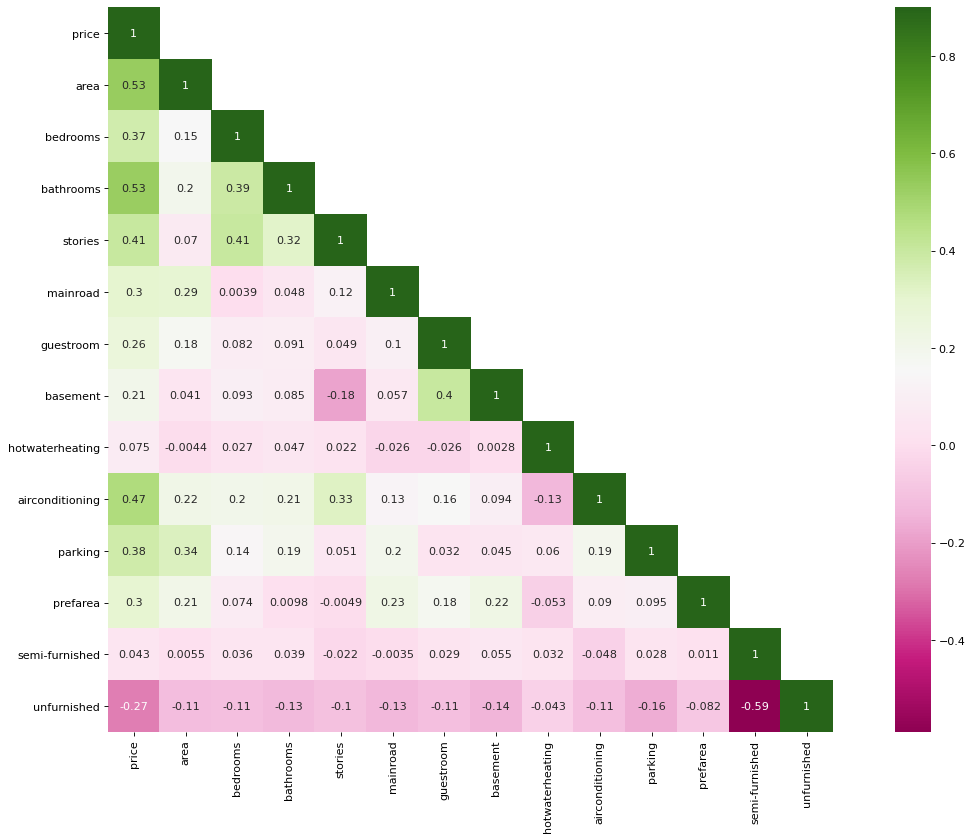

In [12]:
corr = train_data.corr()
mask = np.array(train_data.corr())
mask[np.tril_indices_from(mask)]=False 
plt.figure(figsize = (20, 12), dpi = 80)
sns.heatmap(corr, mask = mask, annot = True, square = True, vmax = .9, cmap = 'PiYG');

## Train, validation & test split :

In [13]:
# From train we have to make train_inputs, train_targets, val_inputs, val_targets

In [14]:
y = train_data.pop('price')
X = train_data

print(X.shape)
print(y.shape)

(436, 13)
(436,)


In [15]:
train_inputs, val_inputs, train_targets, val_targets = tts(X, y, test_size = .30, random_state = 42)

In [16]:
print(f'train_inputs : {train_inputs.shape}')
print(f'val_inputs : {val_inputs.shape}')
print(f'train_targets : {train_targets.shape}')
print(f'val_targets : {val_targets.shape}')

train_inputs : (305, 13)
val_inputs : (131, 13)
train_targets : (305,)
val_targets : (131,)


In [17]:
train_inputs.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
58,0.414433,0.6,0.333333,1.000000,1,1,0,0,1,0.333333,0,1,0
144,0.209622,0.6,0.000000,0.333333,1,1,1,0,1,0.333333,0,0,0
203,0.257732,0.6,0.000000,0.333333,1,0,0,0,0,0.000000,0,1,0
92,0.216495,0.4,0.333333,1.000000,1,1,0,0,1,0.000000,0,0,0
514,0.092784,0.4,0.000000,0.333333,0,0,0,0,0,0.000000,0,1,0


In [18]:
train_targets.head()

58     0.520000
144    0.366667
203    0.300000
92     0.443333
514    0.070000
Name: price, dtype: float64

In [19]:
test_data.shape

(109, 14)

In [20]:
test_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,0,1
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1,0
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0,0


In [21]:
test_targets = test_data.pop('price')
test_inputs = test_data

print(f'test_inputs : {list(test_inputs.shape)}')
print(f'test_targets : {list(test_targets.shape)}')

test_inputs : [109, 13]
test_targets : [109]


## Linear model fitting :

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# --------------------------- Training data : Fit & Predict ---------------------------- #

model = LinearRegression().fit(train_inputs, train_targets)

# -------------------------------------------------------------------------------------- 

train_preds = model.predict(train_inputs)
train_rmse = mean_squared_error(train_preds, train_targets, squared = False)
train_acc = model.score(train_inputs, train_preds)

print(f'Train RMSE :{round(train_rmse, 3)}')
print('-'*30)
print(f'Train accuracy : {round(train_acc, 3)}')

Train RMSE :0.093
------------------------------
Train accuracy : 1.0


In [27]:
# ----------------------------- Validation : Fit & Predict ----------------------------- #

val_preds = model.predict(val_inputs)
val_rmse = mean_squared_error(val_preds, val_targets, squared = False)
val_acc = model.score(val_inputs, val_preds)

# --------------------------------------------------------------------------------------- 

print(f'Validation RMSE :{round(val_rmse, 3)}')
print('-'*30)
print(f'Validation accuracy : {round(val_acc, 3)}')

Validation RMSE :0.096
------------------------------
Validation accuracy : 1.0
